# Exponential Distribution
The Exponential distribution is a continuous probability distribution that models **waiting times between independent events** that occur at a **constant average rate**.  It is the natural model for "how long until the next event happens" in a **Poisson process**.

Think of it as the distribution of:
- Time until the next bus arrives (if buses come randomly but on average every 10 minutes)
- Time until a radioactive particle decays
- Time between customer arrivals at a service desk
- Time until a machine fails

### Core Idea
If events happen **independently** and with a **constant rate** $\lambda$, then the waiting time $X$ until the next event follow an exponential distribution.
- Rate parameter: $\lambda > 0$
- Mean waiting time: $\frac{1}{\lambda}$

The exponential distribution is also sometimes parameterized by $\beta$, which is simply:
$$
\beta = \frac{1}{\lambda}
$$
| Parameter | Meaning | Units | Intuition |
|---|---|---|---|
| $\lambda$ | Rate | events per time | "How often events happen" |
| $\beta$ | Scale | time per event | "How long you wait for an event" |

### Key Properties
**Probability Density Function (PDF)**
$$
f(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

**Cumulative Distribution Function (CDF)**
$$
F(x) = 1-e^{-\lambda x}
$$

**Mean**
$$
E[X] = \frac{1}{\lambda}
$$

**Variance**
$$
Var(X)=\frac{1}{\lambda^2}
$$

**Memoryless Property**
$$
P(X > s+t \mid X > s) = P(X > t)
$$
The future does not depend on the past.  If a machine has already survived 10 hours, the probability it survives 5 more hours is the same as if it were brand new.  Only two distributions in probability have this property:
- Geometric (discrete)
- Exponential (continuous)

### Relationship to Other Distributions
- It is a special case of the **Gamma distribution** with shape parameter $k=1$.
- It describes the **interarrival times** in a Poisson process, while the Poisson distribution describes the **number of events** in a fixed time interval.

### Where It Shows Up in Real Life
The exponential distribution is widely used in:
- Reliability engineering (time to failure)
- Queueing theory (time between arrivals)
- Physics (radiactive decay)
- Computer science (randomized algorithms, Monte Carlo methods)
- Operations research (service times, wait times)

### Plot
*Notice the parameter* `scale=1/lam` *for the pdf function*

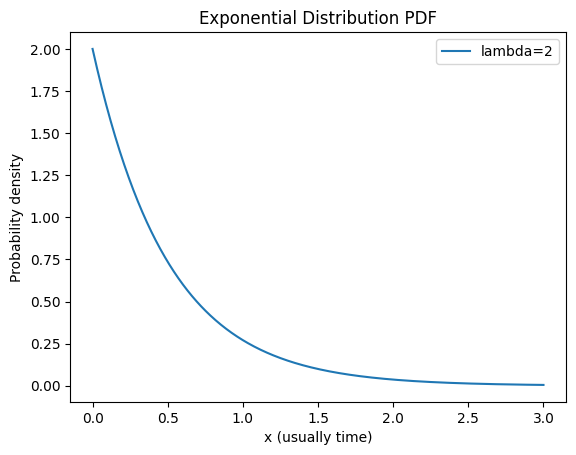

In [1]:
import scipy.stats as stats
import numpy as numpy
import matplotlib.pyplot as plt

lam = 2
xs = numpy.linspace(0, 3, 500)
pdf = stats.expon.pdf(xs, scale=1/lam)

fig, ax = plt.subplots()
ax.set_title('Exponential Distribution PDF')
ax.set_xlabel('x (usually time)')
ax.set_ylabel('Probability density')
ax.plot(xs, pdf, label=f'lambda={lam}')
plt.legend()
plt.show()

### Minimum of Independent Exponential Random Variables

Let $𝑋_1,𝑋_2,𝑋_3$ be independent Exponential random variables with rates $𝜆_1, 𝜆_2, 𝜆_3$.
- Find the distribution of $𝑌=min⁡(𝑋_1,𝑋_2,𝑋_3)$.

Think of $𝑋_1,𝑋_2,𝑋_3$ as three different waiting times — for example:
- $𝑋_1$: time until machine 1 breaks
- $𝑋_2$: time until machine 2 breaks
- $𝑋_3$: time until machine 3 breaks

Each one is random and independent. Then:
$$
Y = min(X_1, X_2, X_3)
$$
means: **"The earliest of the three times."**.  It's the first event to occur among the three exponential clocks.  The magic is that exponential clocks behave **independently** and **memorylessly**, and that combination forces the minimum to also be exponential.  Let's break down why.

#### The event "none have happened yet"
To find the distribution of the minimum, we look at:
$$
P(Y > t) = P(X_1 > t, X_2 > t, X_3 > t).
$$

This means: **"All clocks are still ticking at time t."**.  Because the clocks are independent:
$$
P(Y > T) = P(X_1 > t) P(X_2 > t) P(X_3 > t)
$$

And for an exponential with rate $\lambda$.  The survival function:
$$
P(X > t) = e{-\lambda t}
$$

So:
$$
P(Y > t) = e^{-\lambda_1 t} e^{-\lambda_2 t} e^{-\lambda_3 t} = e^{-(\lambda_1 + \lambda_2 + \lambda_3) t}
$$

But this is **exactly** the survival function of an exponential with rate
$$
\lambda_1 + \lambda_2 + \lambda_3
$$

The minimum of independent exponential random variables is exponential because:
- The probability all survive past time $t$ is the product of their **survival probabilities**
- This product simplifies to an exponential with rate equal to the sum of the rates.
- Intuitively, exponential clocks "compete", and the combined hazard rate is the sum of the individual hazards.

#### Example
Let $𝑋_1,𝑋_2,𝑋_3$ be independent Exponential random variables with rates $𝜆_1=1, 𝜆_2=4, 𝜆_3=5$.

Find the distribution of $𝑌=min⁡(𝑋_1,𝑋_2,𝑋_3)$.

So this would be equivalent to an exponential distribution with rate $ \lambda = 1 + 4 + 5 = 10 $
$$
P(Y = t) = 10 e^{-10 t}
$$

Compute 𝑃(𝑌<0.2)
$$
P(Y < 0.2) = 1 - e^{-10 \times 0.2} = 0.86
$$

So $ Y < 0.2 $ means: **"At least one of the three exponential clocks rings before time 0.2."**, and this will happen with a probability of 86%.